In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(" Mechanical properties.csv")
data.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [3]:
data.isnull().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [4]:
data = data.drop(columns='Alloy code')
data.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


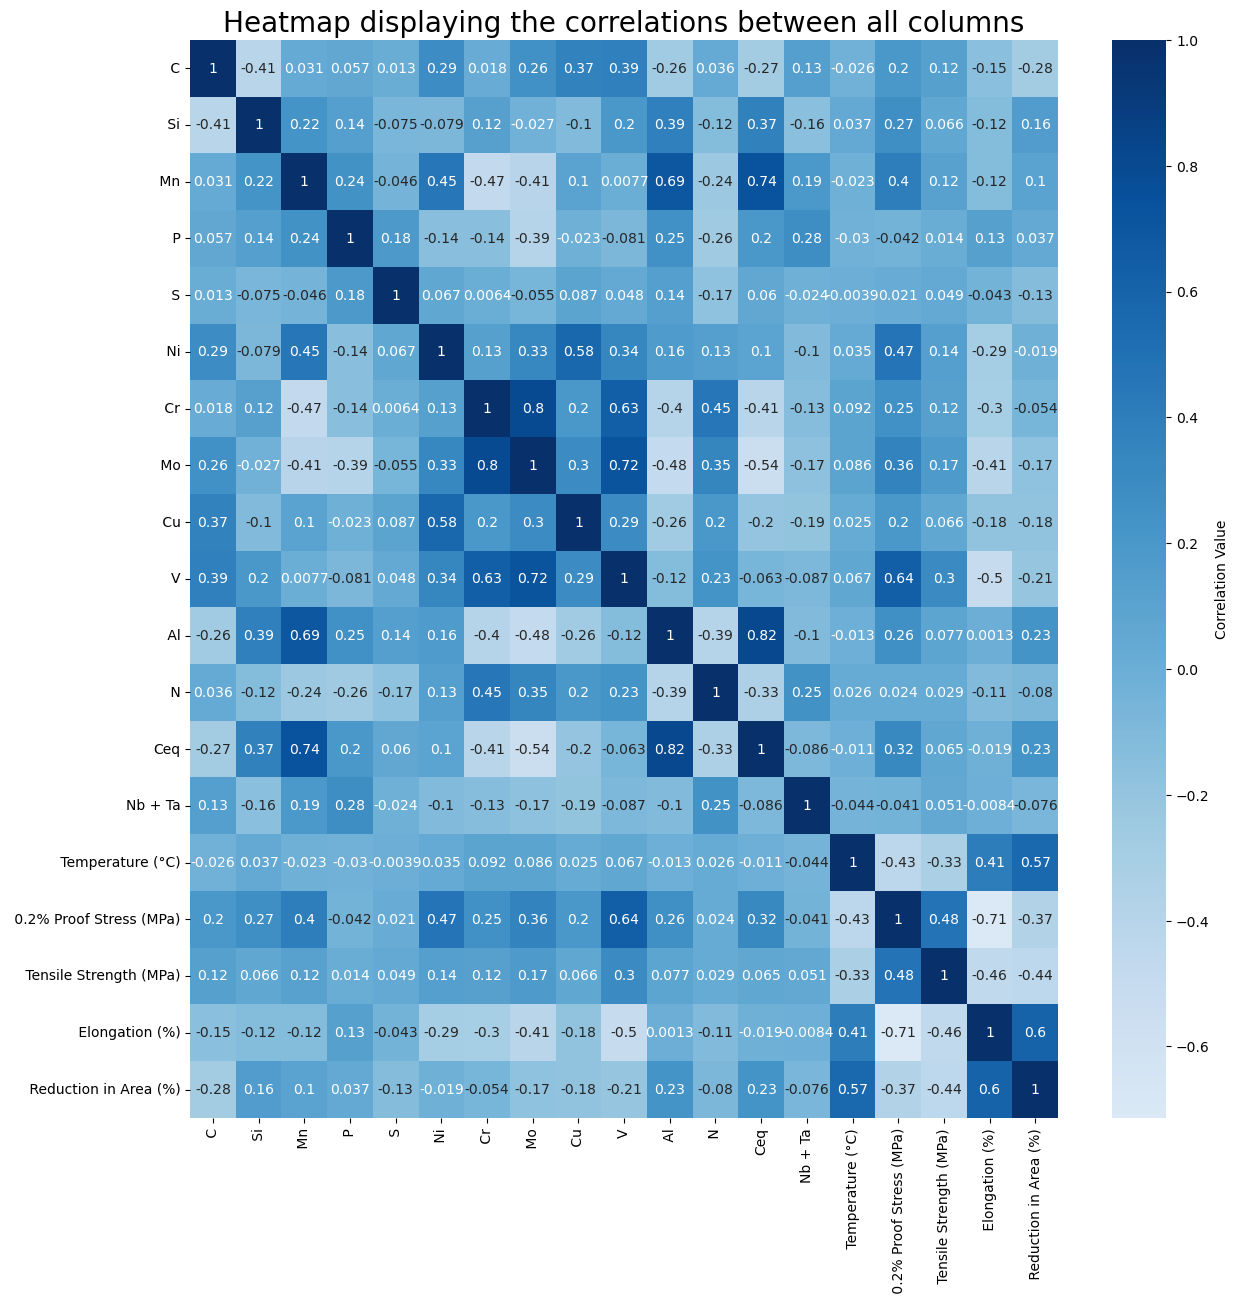

In [5]:
corr = data.corr()

plt.figure(figsize=(14,14))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0,annot=True, cmap="Blues", cbar_kws={'label': 'Correlation Value'})
plt.show()

<span style="font-size:20px"><b>Data Preparation For Machine Learning</b></span>

In [179]:
X=data.iloc[:,0:15].values

In [122]:
y= data.iloc[:,15].values

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [134]:
y_proof_stress=y_test.copy()
y_proof_stress.shape

(92,)

<span style="font-size:20px"><b>0.2% Proof Stress</b></span>

In [9]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<span style="font-size:15px"><b>Linear Regression</b></span>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred_proof_stress_lr = model.predict(X_test)
r2_proof_stress_lr = r2_score(y_test, y_pred_proof_stress_lr)
print('r2 score for Lr : {}'.format(r2_proof_stress_lr))

r2 score for Lr : 0.8936164498681914


<span style="font-size:15px"><b>Decision Tree</b></span>

In [11]:
from sklearn.tree import DecisionTreeRegressor

model_Dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_proof_stress_Dt= model_Dt.predict(X_test)
r2_proof_stress_Dt = r2_score(y_test, y_pred_proof_stress_Dt)
print('r2 score for Dt: {}'.format(r2_proof_stress_Dt))

r2 score for Dt: 0.9510377973193584


<span style="font-size:15px"><b>Random Forest</b></span>

In [12]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

model_Rf = RandomForestRegressor(max_depth= 19, n_estimators= 13,random_state=0).fit(X_train,y_train)
y_pred_proof_stress_Rf= model_Rf.predict(X_test)
r2_proof_stress_Rf = r2_score(y_test, y_pred_proof_stress_Rf)
print('r2 score for Rf: {}'.format(r2_proof_stress_Rf))

r2 score for Rf: 0.960845293320126


<span style="font-size:20px"><b>OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)</b></span>

In [13]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 1)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [14]:
# Grid Search CV for random Forest model

regr=RandomForestRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

In [15]:
# Create the grid

grid_search={'n_estimators': n_estimator,
           'max_depth': depth}

In [17]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(X_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [18]:
predictions_GRF=gridcv_rf.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [20]:
GRF_r2 = r2_score(y_test, predictions_GRF)

In [21]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 19, 'n_estimators': 13}
R-squared = 0.96.
RMSE =  27.277813509395457


<span style="font-size:20px"><b>Tensile Strength</b></span>

In [136]:
y= data.iloc[:,16].values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [138]:
y_Tensile=y_test.copy()
y_Tensile.shape

(92,)

In [24]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<span style="font-size:15px"><b>Linear Regression</b></span>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred_Tensile_lr = model.predict(X_test)
r2_Tensile_lr = r2_score(y_test, y_pred_Tensile_lr)
print('r2 score for lr : {}'.format(r2_Tensile_lr))

r2 score for lr : 0.6778724350685124


<span style="font-size:15px"><b>Decision Tree</b></span>

In [26]:
from sklearn.tree import DecisionTreeRegressor

model_Dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_Tensile_Dt= model_Dt.predict(X_test)
r2_Tensile_Dt = r2_score(y_test, y_pred_Tensile_Dt)
print('r2 score for Dt: {}'.format(r2_Tensile_Dt))

r2 score for Dt: 0.877067301434667


<span style="font-size:15px"><b>Random Forest</b></span>

In [27]:
from sklearn.ensemble import RandomForestRegressor

model_Rf = RandomForestRegressor(max_depth= 17, n_estimators=13,random_state=42).fit(X_train,y_train)
y_pred_Tensile_Rf= model_Rf.predict(X_test)
r2_Tensile_Rf = r2_score(y_test, y_pred_Tensile_Rf)
print('r2 score for Rf: {}'.format(r2_Tensile_Rf))

r2 score for Rf: 0.964434455094966


<span style="font-size:20px"><b>OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)</b></span>

In [28]:
regr=RandomForestRegressor(random_state=42)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

In [29]:
grid_search={'n_estimators': n_estimator,
           'max_depth': depth}

In [30]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(X_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [31]:
predictions_GRF=gridcv_rf.predict(X_test)

In [32]:
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [33]:
GRF_r2 = r2_score(y_test, predictions_GRF)

In [34]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 17, 'n_estimators': 13}
R-squared = 0.96.
RMSE =  25.40747398387293


<span style="font-size:20px"><b>Elongation</b></span>

In [180]:
y = data.iloc[:,17].values

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [182]:
y_Elongation=y_test.copy()
y_Elongation.shape

(92,)

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<span style="font-size:15px"><b>Linear Regression</b></span>

In [162]:
model = LinearRegression().fit(X_train, y_train)
y_pred_Elongation_lr = model.predict(X_test)
r2_Elongation_lr = r2_score(y_test, y_pred_Elongation_lr)
print('r2 score : {}'.format(r2_Elongation_lr))

r2 score : 0.584995464165518


<span style="font-size:15px"><b>Decision Tree</b></span>

In [163]:
model_Dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_Elongation_Dt= model_Dt.predict(X_test)
r2_Elongation_Dt = r2_score(y_test,y_pred_Elongation_Dt)
print('r2 score for Dt: {}'.format(r2_Elongation_Dt))

r2 score for Dt: 0.7645599944402277


<span style="font-size:15px"><b>Random Forest</b></span>

In [62]:
model_Rf= RandomForestRegressor().fit(X_train,y_train)
y_pred_Elongation_Rf= model_Rf.predict(X_test)
r2_Elongation_Rf = r2_score(y_test,y_pred_Elongation_Rf)
print('r2 score for Rf: {}'.format(r2_Elongation_Rf))

r2 score for Rf: 0.9196036945232154


<span style="font-size:20px"><b>OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)</b></span>

In [63]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 1)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [183]:
regr=RandomForestRegressor(random_state=1)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

In [184]:
grid_search={'n_estimators': n_estimator,
           'max_depth': depth}

In [185]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(X_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

C:\Users\sahaj\python\New folder\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [49]:
predictions_GRF=gridcv_rf.predict(X_test)

In [50]:
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [51]:
GRF_r2 = r2_score(y_test, predictions_GRF)

In [52]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 21, 'n_estimators': 17}
R-squared = 0.91.
RMSE =  2.7978774004495697


<span style="font-size:20px"><b>Reduction in Area</b></span>

In [169]:
y = data.iloc[:,18].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [171]:
y_Reduction=y_test.copy()
y_Reduction.shape

(92,)

<span style="font-size:15px"><b>feature scaling</b></span>

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<span style="font-size:15px"><b>Linear Regression</b></span>

In [173]:
model = LinearRegression().fit(X_train, y_train)
y_pred_Reduction_lr = model.predict(X_test)
r2_Reduction_lr = r2_score(y_test, y_pred_Reduction_lr)
print('r2 score : {}'.format(r2_Reduction_lr))

r2 score : 0.4291670113128401


<span style="font-size:15px"><b>Decision Tree</b></span>

In [174]:
model_Dt= DecisionTreeRegressor().fit(X_train,y_train)
y_pred_Reduction_Dt= model_Dt.predict(X_test)
r2_Reduction_Dt = r2_score(y_test, y_pred_Reduction_Dt)
print('r2 score for Dt: {}'.format(r2_Reduction_Dt))

r2 score for Dt: 0.7967356182164655


<span style="font-size:15px"><b>Random Forest</b></span>

In [175]:
model_Rf = RandomForestRegressor(max_depth=19, n_estimators=19).fit(X_train,y_train)
y_pred_Reduction_Rf= model_Rf.predict(X_test)
r2_Reduction_Rf = r2_score(y_test, y_pred_Reduction_Rf)
print('r2 score for Rf: {}'.format(r2_Reduction_Rf))

r2 score for Rf: 0.882593933372765


<span style="font-size:20px"><b>OPTIMIZATION OF RESULTS ( with PARAMETERS TUNING)</b></span>

In [92]:
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [93]:
regr=RandomForestRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

In [94]:
grid_search={'n_estimators': n_estimator,
           'max_depth': depth}

In [95]:
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(X_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [96]:
from sklearn.metrics import mean_squared_error
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [97]:
predictions_GRF=gridcv_rf.predict(X_test)

In [98]:
GRF_r2 = r2_score(y_test, predictions_GRF)

In [99]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 19, 'n_estimators': 19}
R-squared = 0.88.
RMSE =  19.654607831801084


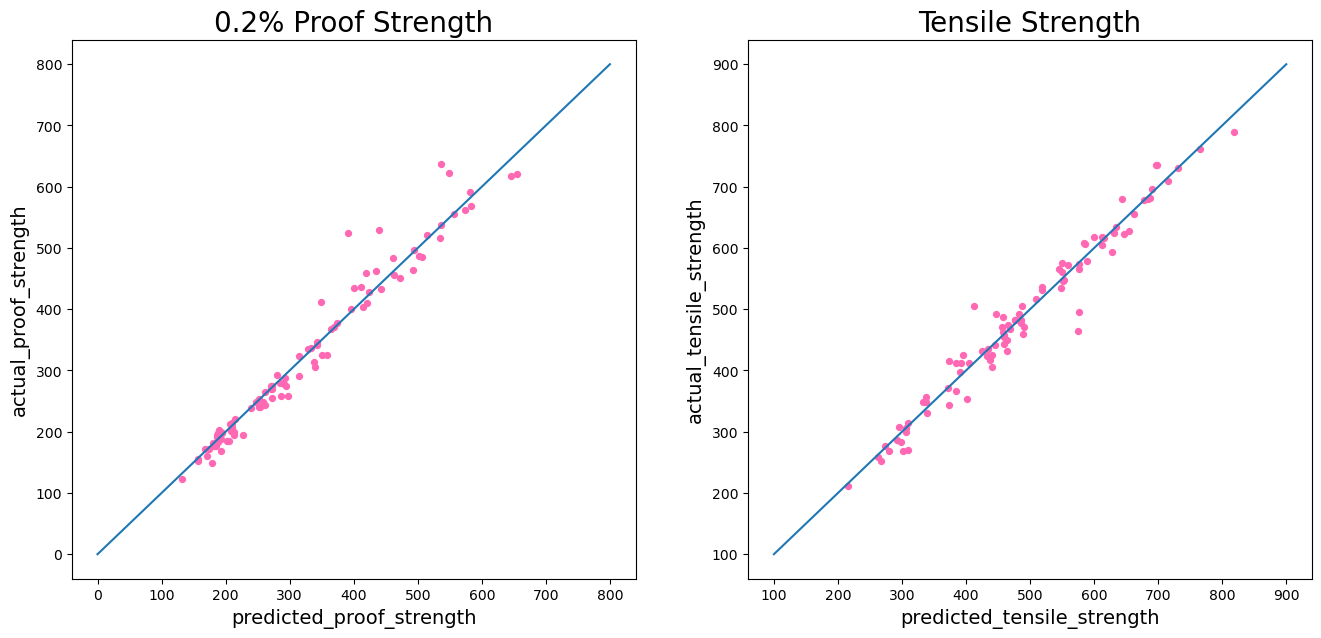

In [153]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,7))

ax0.scatter(y_pred_proof_stress_Rf, y_proof_stress, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_proof_strength', fontsize = 14)
ax0.set_ylabel('actual_proof_strength', fontsize = 14)

ax1.scatter(y_pred_Tensile_Rf, y_Tensile, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

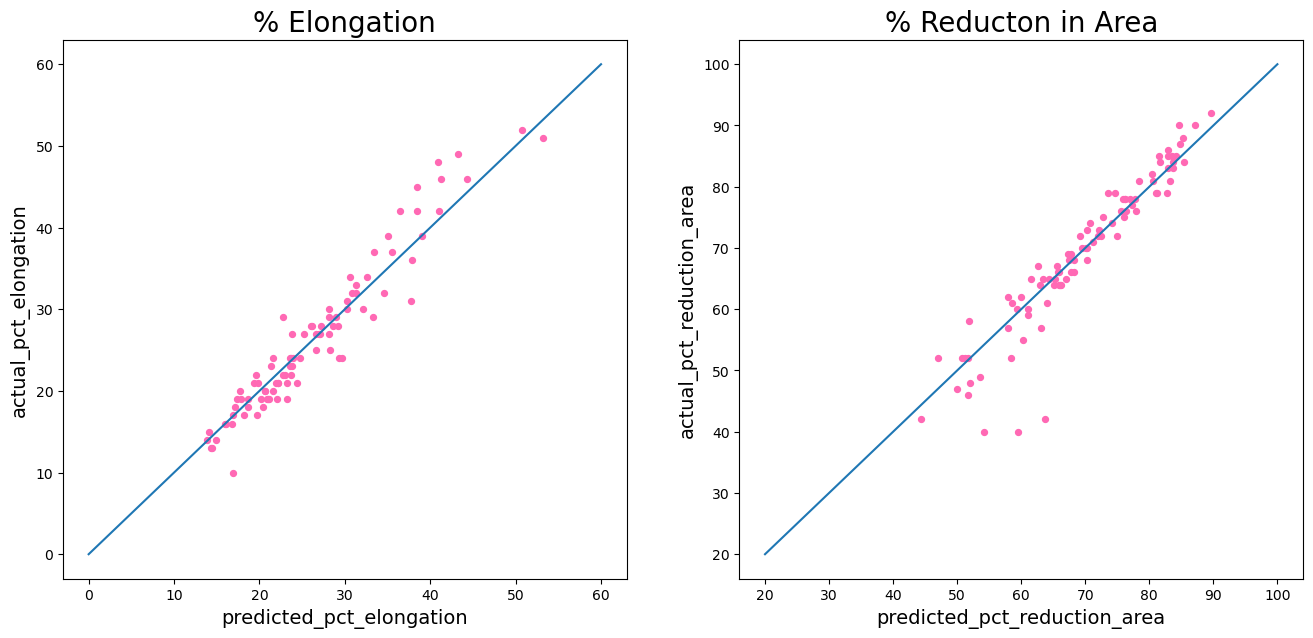

In [177]:
fig, (ax2,ax3) = plt.subplots(1,2,figsize=(16,7))

ax2.scatter(y_pred_Elongation_Rf, y_Elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)

ax3.scatter(y_pred_Reduction_Rf, y_Reduction, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax3.plot(x4, y4)
ax3.set_title('% Reducton in Area', fontsize = 20)
ax3.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax3.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()